# Imports

In [156]:
import pandas as pd
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)

# Load data

In [2]:
data = pd.read_csv('data/data_cleaned_row.csv')
data

In [4]:
data.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'SOURCE', 'ZIPCODE', 'LATITUDE', 'LONGITUDE',
       'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK',
       'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT', 'WAS_REMODELED'],
      dtype='object')

# Define methods

In [5]:
def chi2_test(row, col):
    table = pd.crosstab(row, col)
    chi2, p, df, exp_obs = scipy.stats.chi2_contingency(table)
    print(p)
    print(table)
    print(exp_obs)
    '''return chi2, p, exp_obs, df'''

In [150]:
def contingency_coefficent(row, col, return_C = False, return_mean_chi2 = False):
    if row.size != col.size:
        return None
    n = row.size
    c_table = pd.crosstab(row, col)
    exp_table = scipy.stats.contingency.expected_freq(c_table)
    chi2 = (pow(c_table - exp_table, 2) / exp_table).sum().sum()
    #print(chi2/n)
    C = pow(chi2 / (chi2 + n), 1/2)
    #print(C)
    Ckorr = C * pow(min(c_table.shape) / (min(c_table.shape) - 1), 1/2)
    if return_C:
        if return_mean_chi2:
            return Ckorr, C, chi2/(n * (min(c_table.shape) - 1))
        else:
            return Ckorr, C
    elif return_mean_chi2:
        return Ckorr, chi2/(n * (min(c_table.shape) - 1))
    else:
        return Ckorr

# Calculate Chi²-Tests

In [7]:
contingency_coefficent(data.SQUARE, data.QUADRANT)

(1.0, 0.8660254037844387, 1.0000000000000009)

In [8]:
c_table_SQUARE_QUADRANT = pd.crosstab(data.SQUARE, data.QUADRANT)
chi2, p, df, exp_obs = scipy.stats.chi2_contingency(c_table_SQUARE_QUADRANT)
p

0.0

In [9]:
data.LONGITUDE.corr(data.X)

0.9998854476442489

In [10]:
c_table_LONGITUDE_X = pd.crosstab(data.LONGITUDE, data.X)
chi2, p, df, exp_obs = scipy.stats.chi2_contingency(c_table_LONGITUDE_X)
p

2.309218195071441e-202

In [11]:
data.LATITUDE.corr(data.Y)

0.9999107005857839

In [12]:
c_table_LATITUDE_Y = pd.crosstab(data.LATITUDE, data.Y)
chi2, p, df, exp_obs = scipy.stats.chi2_contingency(c_table_LATITUDE_Y)
p

0.0

In [13]:
contingency_coefficent(data.ASSESSMENT_NBHD, data.ASSESSMENT_SUBNBHD)

(0.9995132614427994, 0.9842526208368781, 0.9688531026054797)

In [14]:
c_table_NBHD_SUBNBHD = pd.crosstab(data.ASSESSMENT_NBHD, data.ASSESSMENT_SUBNBHD)
chi2, p, df, exp_obs = scipy.stats.chi2_contingency(c_table_NBHD_SUBNBHD)
p

0.0

In [15]:
contingency_coefficent(data.CENSUS_BLOCK, data.CENSUS_TRACT)

(1.0, 0.9967050981266119, 1.0000000000000009)

In [16]:
c_table_BLOCK_TRACT = pd.crosstab(data.CENSUS_BLOCK, data.CENSUS_TRACT)
chi2, p, df, exp_obs = scipy.stats.chi2_contingency(c_table_BLOCK_TRACT)
p

0.0

All correlation and chi² calculations show a high correlation and significance between the selected columns. (Small p value means that the null hypthesis that row and column are independent can be rejected.) They are all more or less geographical data about the specific property, so a high correlaltion can be expected. Because they have such high dependets, it is useful to drop some of the columns and only keep a few (one) that gives information about the location. Otherwise, the model would use independent variables that already have some relationship. 

In [59]:
contingency_coefficent(data.HEAT, data.AC)

(0.6728933884453462, 0.5494151509944974, 0.21618566086232072)

In [60]:
contingency_coefficent(data.QUALIFIED, data.ROOF)

(0.08104400155840787, 0.05730676307644332, 0.003294885713460891)

In [102]:
categorical_cols = ["HEAT", "AC", "QUALIFIED", "STYLE", "STRUCT", "GRADE", "CNDTN", "EXTWALL", "ROOF", 
                    "INTWALL", "ZIPCODE", "ASSESSMENT_NBHD", "ASSESSMENT_SUBNBHD", "CENSUS_TRACT", "CENSUS_BLOCK", 
                    "WARD", "SQUARE", "QUADRANT", "WAS_REMODELED", "PRICE"]
numeric_cols = ["BATHRM", "HF_BATHRM", "NUM_UNITS", "ROOMS", "BEDRM", "YR_RMDL", "STORIES"]

In [197]:
data.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'ZIPCODE', 'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD',
       'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE',
       'X', 'Y', 'QUADRANT', 'WAS_REMODELED'],
      dtype='object')

Calculate the contigency coefficients for all categorical values:

In [172]:
def paired_contincency(data):
    names = data.columns.values
    result_df = pd.DataFrame(index=names, columns=names)
    for i in names:
        for ii in names:
            if i == ii:
                result_df[i][ii] = result_df[ii][i] = 1
            else:
                result_df[i][ii] = result_df[ii][i] = contingency_coefficent(data[i], data[ii])
    return result_df

In [ ]:
def paired_

In [173]:
df = paired_contincency(data[categorical_cols])
df

,HEAT,AC,QUALIFIED,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,ZIPCODE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,WAS_REMODELED
HEAT,1,0.672893,0.160831,0.252863,0.320116,0.462405,0.465373,0.339399,0.341135,0.338225,0.476768,0.505264,0.563473,0.570001,0.81379,0.440685,0.789853,0.274231,0.22747
AC,0.672893,1,0.252916,0.199424,0.363133,0.483309,0.609016,0.267741,0.243589,0.199783,0.317455,0.344022,0.395516,0.408533,0.667544,0.267791,0.622165,0.0680088,0.422514
QUALIFIED,0.160831,0.252916,1,0.0907857,0.147041,0.173203,0.319148,0.0737318,0.081044,0.0872065,0.190229,0.215152,0.24777,0.261184,0.458171,0.182296,0.439397,0.100551,0.185743
STYLE,0.252863,0.199424,0.0907857,1,0.500569,0.491552,0.283237,0.514235,0.456604,0.151487,0.545377,0.578962,0.669777,0.679242,0.905822,0.488115,0.895352,0.280677,0.0940036
STRUCT,0.320116,0.363133,0.147041,0.500569,1,0.64143,0.517593,0.513672,0.656903,0.27148,0.680199,0.72656,0.794496,0.803159,0.914733,0.605408,0.902858,0.415653,0.160771
GRADE,0.462405,0.483309,0.173203,0.491552,0.64143,1,0.714278,0.508562,0.436245,0.338683,0.751897,0.814678,0.867908,0.850861,0.945668,0.692874,0.934583,0.507644,0.163406
CNDTN,0.465373,0.609016,0.319148,0.283237,0.517593,0.714278,1,0.460683,0.250908,0.296446,0.285154,0.357312,0.597456,0.602512,0.847608,0.248587,0.802078,0.140822,0.535703
EXTWALL,0.339399,0.267741,0.0737318,0.514235,0.513672,0.508562,0.460683,1,0.516837,0.365203,0.516727,0.598264,0.745699,0.720949,0.924941,0.440203,0.917986,0.295009,0.238476
ROOF,0.341135,0.243589,0.081044,0.456604,0.656903,0.436245,0.250908,0.516837,1,0.344234,0.692437,0.745612,0.787137,0.785898,0.908905,0.659606,0.901531,0.395499,0.246091
INTWALL,0.338225,0.199783,0.0872065,0.151487,0.27148,0.338683,0.296446,0.365203,0.344234,1,0.371965,0.487884,0.588676,0.593969,0.817587,0.368446,0.801523,0.261737,0.190256


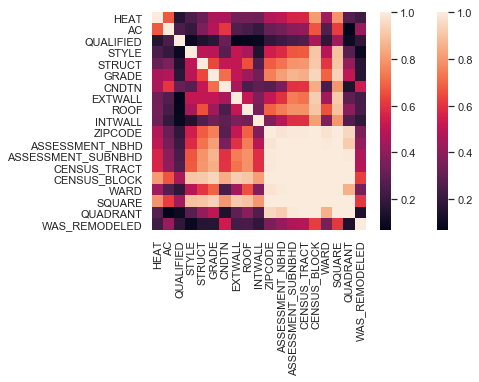

In [182]:
g = sns.heatmap(df.astype(float))
plt.show()

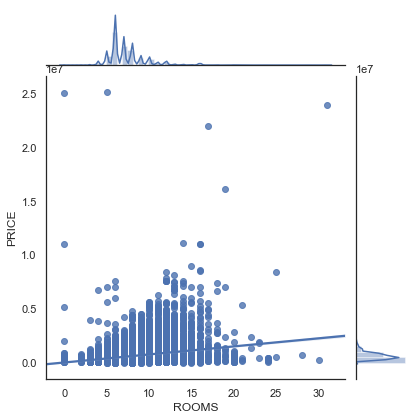

In [51]:
g = sns.jointplot(data.ROOMS, data.PRICE, kind='reg')
plt.show()

In [193]:
data = data.drop("SOURCE", axis=1)